In [ ]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [3]:
X,y = mnist['data'], mnist['target']

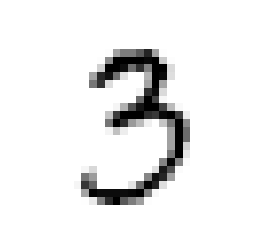

In [4]:
import matplotlib
import matplotlib.pyplot as plt

plt.imshow(X[20000].reshape(28,28), cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()


In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
import numpy as np

shuffle_idx = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_idx], y_train[shuffle_idx]

#for a binary classifier - classify 3
y_train3 = (y_train == 3)
y_test3 = (y_test == 3)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train3)
sgd_clf.predict(X[20000])



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ True], dtype=bool)